In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

from matplotlib import patches
import shapely.geometry as sg
import descartes
from myst_nb import glue

In [2]:
# HIDDEN
def show_intersection():
    plt.figure(figsize=(5, 5))
    # create the circles with shapely
    a = sg.Point(-.5,0).buffer(1.0)
    b = sg.Point(0.5,0).buffer(0.75)

    # compute the 3 parts
    left = a.difference(b)
    right = b.difference(a)
    middle = a.intersection(b)

    # use descartes to create the matplotlib patches
    ax = plt.subplot(111)
    ax.add_patch(descartes.PolygonPatch(left, fc='darkblue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='k', alpha=0.6))
    ax.add_patch(descartes.PolygonPatch(middle, fc='olive', ec='k', alpha=0.8))
    ax.annotate('A', [-0.5, 0])
    ax.annotate('B', [0.5, 0])

    # control display
    plt.title('Not Mutually Exclusive')
    plt.axis('off')
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

## Bounding the Chance of a Union ##

Before we get to larger collections of events, let's consider the union of two events that are not mutually exclusive. The diagram below shows two such events. The union is the entire colored region: the blue, the gold, as well as the intersection.

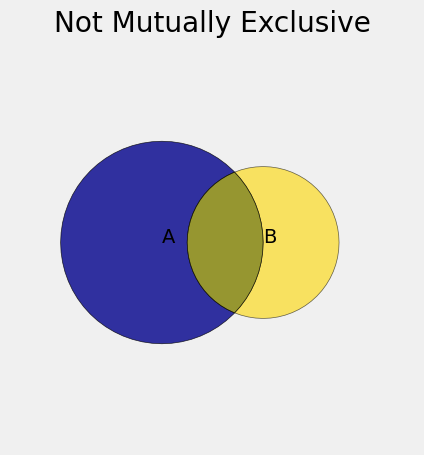

In [3]:
show_intersection()

An exercise in an early chapter asks you to use additivity to show that

$$
P(A \cup B) = P(A) + P(B) - P(AB)
$$

One of the pieces of the formula is the chance of the intersection. If the nature of the dependence between $A$ and $B$ is unknown, it might not be possible to find $P(AB)$. Sometimes, the best we can do is find **bounds** for the chance of the union, not the exact value.

Keep in mind that bounds aren't approximations. They might be quite far off the exact value.

Keep in mind also that bounds on the chance of a union can be manipulated to become bounds on the chance of an intersection.

- The union of a collection of events is that event that at least one of them occurs.
- The complement of the union is the event that none of them occurs, that is, the event that all of them don't occur.
- If the chance of a union is at most $p$, then the chance of its complement is at least $1-p$.

In [4]:
# VIDEO: Bounds on the chance of a union
from IPython.display import YouTubeVideo

vid_bound_union = YouTubeVideo("VqozXmsKzLE")
glue("vid_bound_union", vid_bound_union, display=False)

```{dropdown} See More
:icon: video
{glue:}`vid_bound_union`
```

### Boole's Inequality ###
For $n > 2$, the Venn diagram for the union of $n$ events can be quite complicated with multiple overlaps. So the chance of the union is a little harder to find. We'll do that in the next section. 

For now, we'll observe something much simpler, which is that adding the probabilities of all the individual events and not dealing with the overlaps must give us an upper bound on the chance of the union.

You can see that in the diagram above, for $n = 2$. If you just add $P(A)$ and $P(B)$, you double count the intersection and your answer is larger than $P(A \cup B)$. That is also apparent from the inclusion-exclusion formula above.

*Boole's Inequality* provides an upper bound on the chance of the union of $n$ events. Let $A_1, A_2, \ldots , A_n$ be events. Then Boole's Inequality says that

$$
P(\bigcup_{i=1}^n A_i) \le \sum_{i=1}^n P(A_i)
$$

That is, the chance that at least one of the events occurs can be no larger than the sum of the chances.

We have discussed why the inequality is true for $n = 2$. For general $n$ the inequality can be proved by induction and is left for you as an exercise.

Because $P(\cup_{i=1}^n A_i) \ge P(A_k)$ for each $k$, we have a lower bound too:

$$
P(\bigcup_{i=1}^n A_i) \ge \max\{P(A_i): 1 \le i \le n \}
$$

So

$$
\max\{P(A_i): 1 \le i \le n \} ~ \le ~ P(\bigcup_{i=1}^n A_i)
~ \le ~ \sum_{i=1}^n P(A_i)
$$

For example, if the weather forecast says that the chance of rain on Saturday is 40% and the chance of rain on Sunday is 10%, then the chance that it rains at some point during those two days is at least 40% and at most 50%.

To find the chance exactly, you would need the chance that it rains on both days, which you don't have. Assuming independence doesn't seem like a good idea in this setting. So you cannot compute an exact answer, and must be satisfied with bounds.

```{admonition} Quick Check
In a class, 60% of the students have read <i>The Merchant of Venice</i> and 10% have read <i>Hamlet</i>. Fill in the blanks with the best bounds you can find based on the information given.

(a) The chance that a randomly picked student has read at least one of the two plays is at least $\underline{~~~~~~~~~~~~~}$ and at most $\underline{~~~~~~~~~~~~~}$.

(b) The chance that a randomly picked student has read neither of the two plays is at least $\underline{~~~~~~~~~~~~~}$ and at most $\underline{~~~~~~~~~~~~~}$.

```

```{admonition} Answer
:class: dropdown
(a) 60%, 70%

(b) 30%, 40%

```

Though bounds aren't exact answers or even approximations, they can be very useful. Here is an example of a common use of Boole's Inequality in data science. It has Bonferroni's name attached to it, because Boole and Bonferroni both have related bounds on probabilities of unions.

### Bonferroni Method ###
Suppose you are estimating five parameters based on a random sample, and that for each parameter you have a method that produces a good estimate with any pre-specified chance. For example, if the estimate has to be good with chance 99%, you have a way of doing that.

Now suppose you want your estimates to be such that *all five are good* with chance 95%. What should you do?

It is not enough to make each estimate good with chance 95%. If you do that, the chance that they are all good will be less than 95%, because the event "all are good" is a subset of each event "Estimate $i$ is good."

Boole's Inequality can help you figure out what to do.

Let $A_i$ be the event that Estimate $i$ is good. You want $P(A_1A_2A_3A_4A_5) = 0.95$. But now you are stuck, because all you can control are $P(A_1)$, $P(A_2)$, $P(A_3)$, $P(A_4)$, and $P(A_5)$ individually. You can make each of them as large as you want, but you don't know how they relate to the chance of the intersection, because the five estimates are dependent. They are all based on the same sample.

You can get yourself out of this problem by looking at the complement of the event "all five are good". The complement is "at least one is bad", which is the union of the events "Estimate $i$ is bad". Your condition is

$$
\begin{align*}
0.05 &= P(\text{at least one estimate is bad}) \\
&= P(A_1^c \cup A_2^c \cup A_3^c \cup A_4^c \cup A_5^c  ) \\
&\le P(A_1^c) + P(A_2^c) + P(A_3^c) + P(A_4^c) + P(A_5^c)
~~~ \text{by Boole's Inequality}
\end{align*}
$$

Each term in the sum is the chance that the corresponding estimate is bad. You want those chances to be small. But you also want them to be large enough so that their sum is at least 0.05, because of the calculation above.

One way is to make each of them equal to $0.05/5 = 0.01$, that is 1%. In other words, you have to construct each estimate so that it is good with chance 99% (for example, by constructing a 99% confidence interval). This is called the *Bonferroni Method* of simultaneous inference.

The Bonferroni method shows that if you construct each of five estimates so that it is good with chance 99%, then the chance that all five estimates are good will be at least 95%. 

You can replace 95% by any other threshold and carry out the calculation again to see how good the individual estimates have to be so that they are simultaneously good with a chance that exceeds the threshold.